In [1]:
import numpy as np
import math as m
import glob, os
import csv
import glob, os
import string
import gsw
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from more_itertools import consecutive_groups
import csv
import glob, os
import string
import gsw
import regex as re



In [2]:
#SET THE DIRECTORY WHERE THE FILES ARE
pathF = r'/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Friday'
pathS = r'/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Saturday'
filetype = 'aml'

#import the list of files and sort them
file_listF = glob.glob(os.path.join(pathF, f'*.{filetype}'))
file_listS = glob.glob(os.path.join(pathS,f'*.{filetype}'))
file_listF #T3, E2, E1, T2, T1, T4

['/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Friday/aml_log_2025-02-21_14-56-26.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Friday/aml_log_2025-02-21_14-31-42.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Friday/aml_log_2025-02-21_14-20-28.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Friday/aml_log_2025-02-21_15-08-23.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Friday/aml_log_2025-02-21_15-22-55.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Friday/aml_log_2025-02-21_14-43-20.aml']

In [3]:
def importfiles(file_list,filetype,stationnames):
    if filetype == 'aml':
        fig,axs = plt.subplots(nrows=2,figsize=(6,12),sharex=True)
        dfs = list()
        filenum=0
        for ind, fn in enumerate(file_list):
            nameline = np.nan
            header = np.nan
            with open(fn) as fh:
                for i,line in enumerate(fh):
                    if "MeasurementMetadata" in line:
                        nameline = i
                    elif "MeasurementData" in line:
                        header = i
                    elif "GPSL" in line:
                        print(line)
                        lat_test = re.findall('GPSLatitude=([0-9]+.[0-9]+)', line)
                        lon_test = re.findall('GPSLongitude=(-[0-9]+.[0-9]+)', line)
                        if len(lat_test)>0:
                            lat = lat_test[0]
                        if len(lon_test)>0:
                            lon = lon_test[0]
                    elif i == nameline + 1:
                        line = line.strip()
                        cols = line.split("=",1)[1].split(",")
            data = pd.read_csv(fn,header=header,names=cols)
            data['file'] = fn.split("log_")[-1].split("_")[-1].split(".")[0]
            data_down = data[np.gradient(data['Depth'].rolling(100).mean())>0.012]
            axs[0].plot(data['Depth'])
            axs[1].plot(np.gradient(data['Depth'].rolling(100).mean()))
            counter = 0
            data['profile'] = None
            for i in consecutive_groups(data_down.index):
                inds = list(i)
                if max(data.loc[inds,'Depth']) > 5:
                    file = data.loc[inds,'file'].unique()[0]
                    data.loc[inds,'profile'] = f'{file+string.ascii_lowercase[counter]}'
                    counter = counter + 1
                else:
                    data.loc[inds,'file'] = np.nan
            data = data.dropna()
            data['Latitude'] = lat
            data['Longitude'] = lon
            data['Cruise'] = 'RomaneCTDs'
            data['Station'] = stationnames[filenum]
            data['Type'] = 'A'
            dfs.append(data)
            filenum+=1
    

            #print(dfs)
        df = pd.concat(dfs, ignore_index=True)
#         df = df.drop('file',axis=1)
#         axs[1].set_ylim(0.016,0.04)
#         print(df)
    return df



In [4]:
file_listS

['/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Saturday/aml_log_2025-02-22_11-04-29.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Saturday/aml_log_2025-02-22_11-29-26.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Saturday/aml_log_2025-02-22_10-25-55.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Saturday/aml_log_2025-02-22_10-46-21.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Saturday/aml_log_2025-02-22_10-39-16.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassage_Data/Saturday/aml_log_2025-02-22_10-11-05.aml',
 '/Users/romane/Library/CloudStorage/OneDrive-UBC/UBC/Winter Term 2/EOSC 573/Project/SatellitePassag

GPSLatitude=48.86056

GPSLongitude=-125.16426

GPSLatitude=48.85865

GPSLongitude=-125.18270

GPSLatitude=48.85622

GPSLongitude=-125.18845

GPSLatitude=48.86111

GPSLongitude=-125.15707

GPSLatitude=48.86416

GPSLongitude=-125.15279

GPSLatitude=48.85905

GPSLongitude=-125.17481

GPSLatitude=48.86145

GPSLongitude=-125.16085

GPSLatitude=48.86298

GPSLongitude=-125.15197

GPSLatitude=48.86116

GPSLongitude=-125.18389

GPSLatitude=48.86039

GPSLongitude=-125.17577

GPSLatitude=48.85899

GPSLongitude=-125.17382

GPSLatitude=48.86092

GPSLongitude=-125.18383

GPSLatitude=48.86204

GPSLongitude=-125.15752

GPSLatitude=48.86037

GPSLongitude=-125.16484



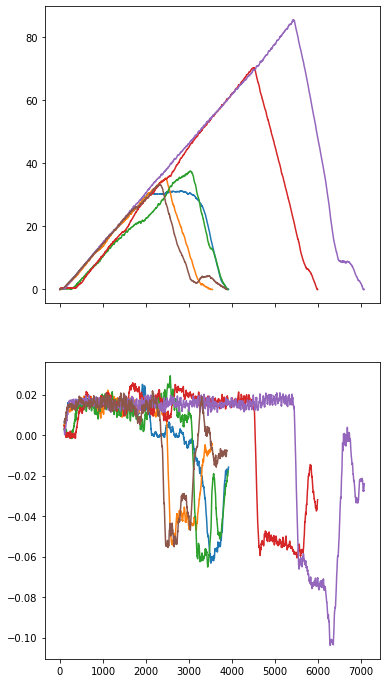

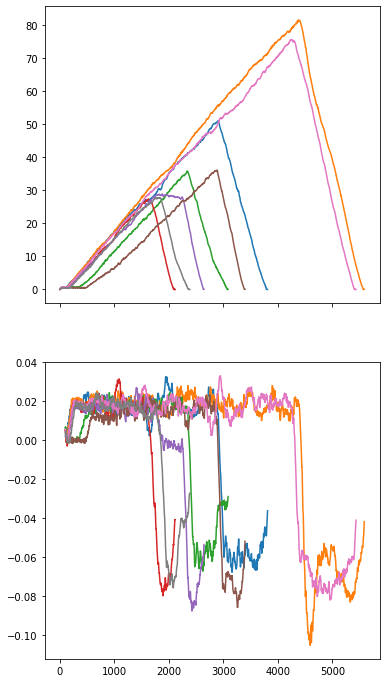

In [5]:
# stationnamesF = ['T3_F','E2_F','E1_F','T2_F','T1_F','T4_F']
stationnamesF = ['F4','F2','F1','F6','F5','F3']

df_totF = importfiles(file_listF,filetype,stationnamesF)
# stationnamesS = ['T31_S','T1_S','E21_S','T41_S','T42_S','E22_S','T2_S','T32_S']
stationnamesS = ['S6','S7','S1','S4','S3','S2','T2_S','S5']

df_totS = importfiles(file_listS[:8],filetype,stationnamesS)

In [7]:
# df_totS.to_csv('testingODVSaturday')
# df_totF.to_csv('testingODVFriday')

In [6]:
def fetch_aml_data(file,station_name):
    dfs = list()
    nameline = np.nan
    header = np.nan
    with open(file) as fh:
        for i,line in enumerate(fh):
            if "MeasurementMetadata" in line:
                nameline = i
            elif "MeasurementData" in line:
                header = i
            elif "GPSL" in line:
                print(line)
                lat_test = re.findall('GPSLatitude=([0-9]+.[0-9]+)', line)
                lon_test = re.findall('GPSLongitude=(-[0-9]+.[0-9]+)', line)
                if len(lat_test)>0:
                    lat = lat_test[0]
                if len(lon_test)>0:
                    lon = lon_test[0]
                
            elif i == nameline + 1:
                line = line.strip()
                cols = line.split("=",1)[1].split(",")
    data = pd.read_csv(file,header=header,names=cols)
    data['file'] = file.split("log_")[-1].split("_")[-1].split(".")[0]
    data['Latitude'] = lat
    data['Longitude'] = lon
    data['StationID'] = station_name
    print(data['Time'].iloc[0])
    print(station_name)
    print(lat,lon)
    
    return data
    

In [6]:
#T3, E2, E1, T2, T1, T4
S4 = fetch_aml_data(file_listF[0],'S4')
S2 = fetch_aml_data(file_listF[1],'S2')
S1 = fetch_aml_data(file_listF[2],'S1')
S5 = fetch_aml_data(file_listF[3],'S5')
S6 = fetch_aml_data(file_listF[4],'S6')
S3 = fetch_aml_data(file_listF[5],'S3')
stations_slack = [S1,S2,S3,S4,S5,S6]

# T3_F = fetch_aml_data(file_listF[0],'T3_F')
# E2_F = fetch_aml_data(file_listF[1],'E2_F')
# E1_F = fetch_aml_data(file_listF[2],'E1_F')
# T2_F = fetch_aml_data(file_listF[3],'T2_F')
# T1_F = fetch_aml_data(file_listF[4],'T1_F')
# T4_F = fetch_aml_data(file_listF[5],'T4_F')
# stations_F = [E1_F,E2_F,T4_F,T3_F,T2_F,T1_F]

E6 = fetch_aml_data(file_listS[0],'E6')
E8 = fetch_aml_data(file_listS[1],'E8')
E2 = fetch_aml_data(file_listS[2],'E2')
E4 = fetch_aml_data(file_listS[3],'E4')
E3 = fetch_aml_data(file_listS[4],'E3')
E1 = fetch_aml_data(file_listS[5],'E1')
E7 = fetch_aml_data(file_listS[6],'E7')
E5 = fetch_aml_data(file_listS[7],'E5')

# T31_S = fetch_aml_data(file_listS[0],'T31_S') 6
# T1_S = fetch_aml_data(file_listS[1],'T1_S')   8
# E22_S = fetch_aml_data(file_listS[2],'E22_S') 2
# T41_S = fetch_aml_data(file_listS[3],'T41_S') 4
# T42_S = fetch_aml_data(file_listS[4],'T42_S') 3
# E21_S = fetch_aml_data(file_listS[5],'E21_S') 1
# T2_S = fetch_aml_data(file_listS[6],'T2_S')   7
# T32_S = fetch_aml_data(file_listS[7],'T32_S') 5


stations_ebb = [E1,E2,E3,E4,E5,E6,E7,E8]

NameError: name 'fetch_aml_data' is not defined

In [10]:
E1

,Date,Time,Cond,TempCT,pH,Turbidity,DO,TempDO,DOM,Pressure,Salinity,Density,CalcSV,Depth,file,Latitude,Longitude,StationID
0,2025-02-22,10:11:05.67,31.966,7.730,4.98,2.81,318.17,9.66,0.22,-0.02576,30.712761,1023.946167,1476.128052,-0.02554,10-11-05,48.86092,-125.18383,E1
1,2025-02-22,10:11:05.77,31.884,7.710,5.14,1.22,318.17,9.66,0.19,0.01201,30.642340,1023.893677,1475.967896,0.01191,10-11-05,48.86092,-125.18383,E1
2,2025-02-22,10:11:05.87,31.846,7.715,5.29,0.55,318.17,9.66,0.21,0.02822,30.598452,1023.858643,1475.931641,0.02798,10-11-05,48.86092,-125.18383,E1
3,2025-02-22,10:11:05.97,31.817,7.704,5.39,0.06,318.17,9.66,0.26,0.06265,30.577085,1023.843628,1475.862061,0.06212,10-11-05,48.86092,-125.18383,E1
4,2025-02-22,10:11:06.07,31.811,7.694,5.51,0.00,318.17,9.66,0.33,0.10161,30.579870,1023.847351,1475.827881,0.10075,10-11-05,48.86092,-125.18383,E1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,2025-02-22,10:16:44.97,0.266,7.770,8.18,101.99,331.94,7.65,0.15,-0.05268,0.191074,1000.015930,1438.426025,-0.05223,10-11-05,48.86092,-125.18383,E1
3394,2025-02-22,10:16:45.07,0.395,7.783,8.18,89.91,331.94,7.65,0.17,-0.03409,0.286678,1000.091187,1438.602417,-0.03380,10-11-05,48.86092,-125.18383,E1
3395,2025-02-22,10:16:45.17,0.141,7.796,8.18,49.47,331.94,7.65,0.14,-0.03728,0.099956,999.942200,1438.416748,-0.03697,10-11-05,48.86092,-125.18383,E1
3396,2025-02-22,10:16:45.27,0.065,7.814,8.18,79.03,331.94,7.65,0.09,-0.03840,0.045032,999.897461,1438.422852,-0.03807,10-11-05,48.86092,-125.18383,E1


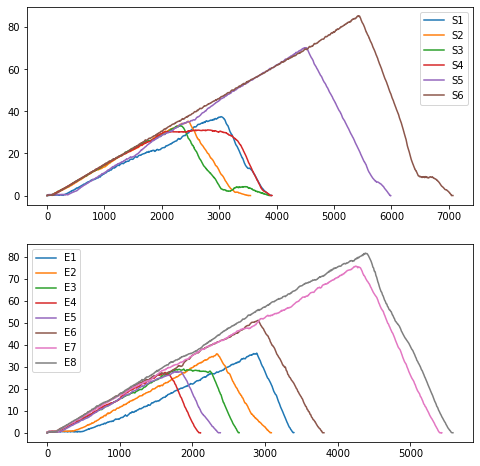

In [8]:
fig,ax = plt.subplots(2,1,figsize=[8,8])
for i in range(len(stations_slack)):
    labels = stations_slack[i]["StationID"][0]
    ax[0].plot(stations_slack[i]["Depth"],label=labels)
    
for i in range(len(stations_ebb)):
    labels = stations_ebb[i]["StationID"][0]
    ax[1].plot(stations_ebb[i]["Depth"],label=labels)
    

ax[0].legend()
ax[1].legend()

## Selecting the Downcast of Friday

<IPython.core.display.Javascript object>


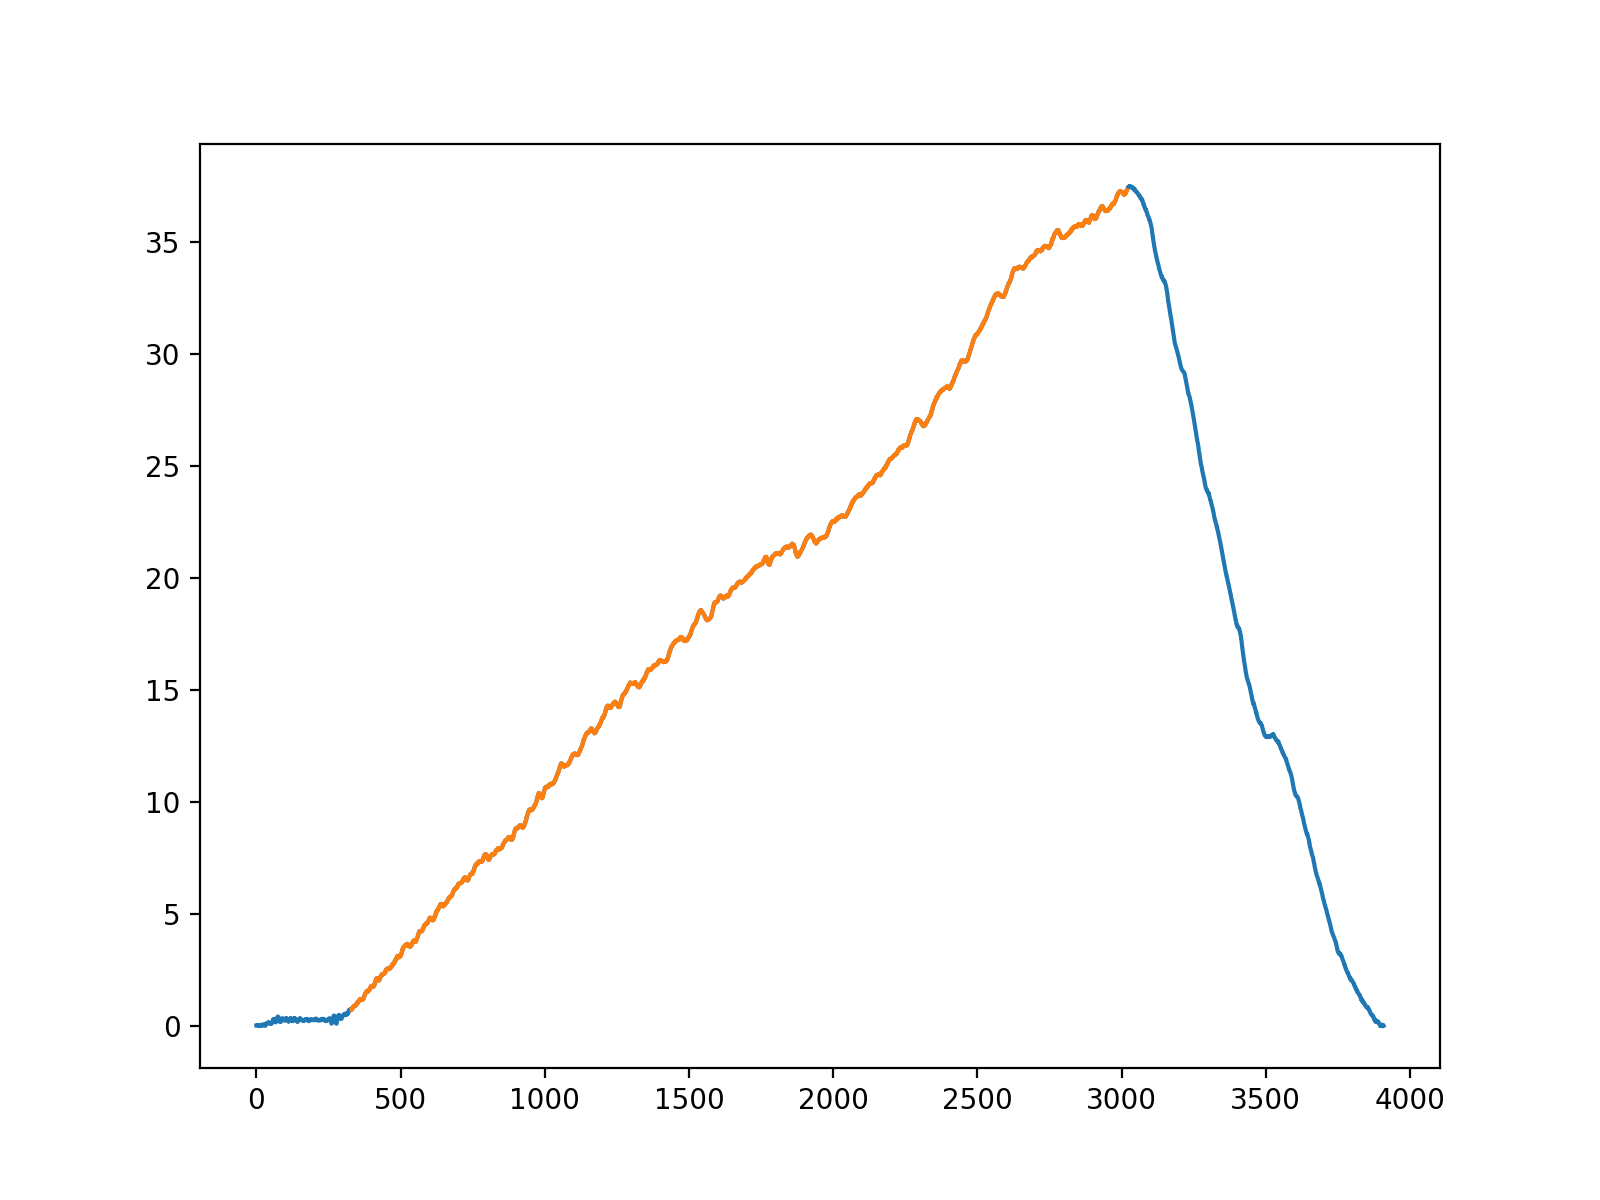

In [18]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(S1['Depth'])
S1_down = S1.iloc[330:3020].copy()
ax.plot(S1_down['Depth'])

<IPython.core.display.Javascript object>


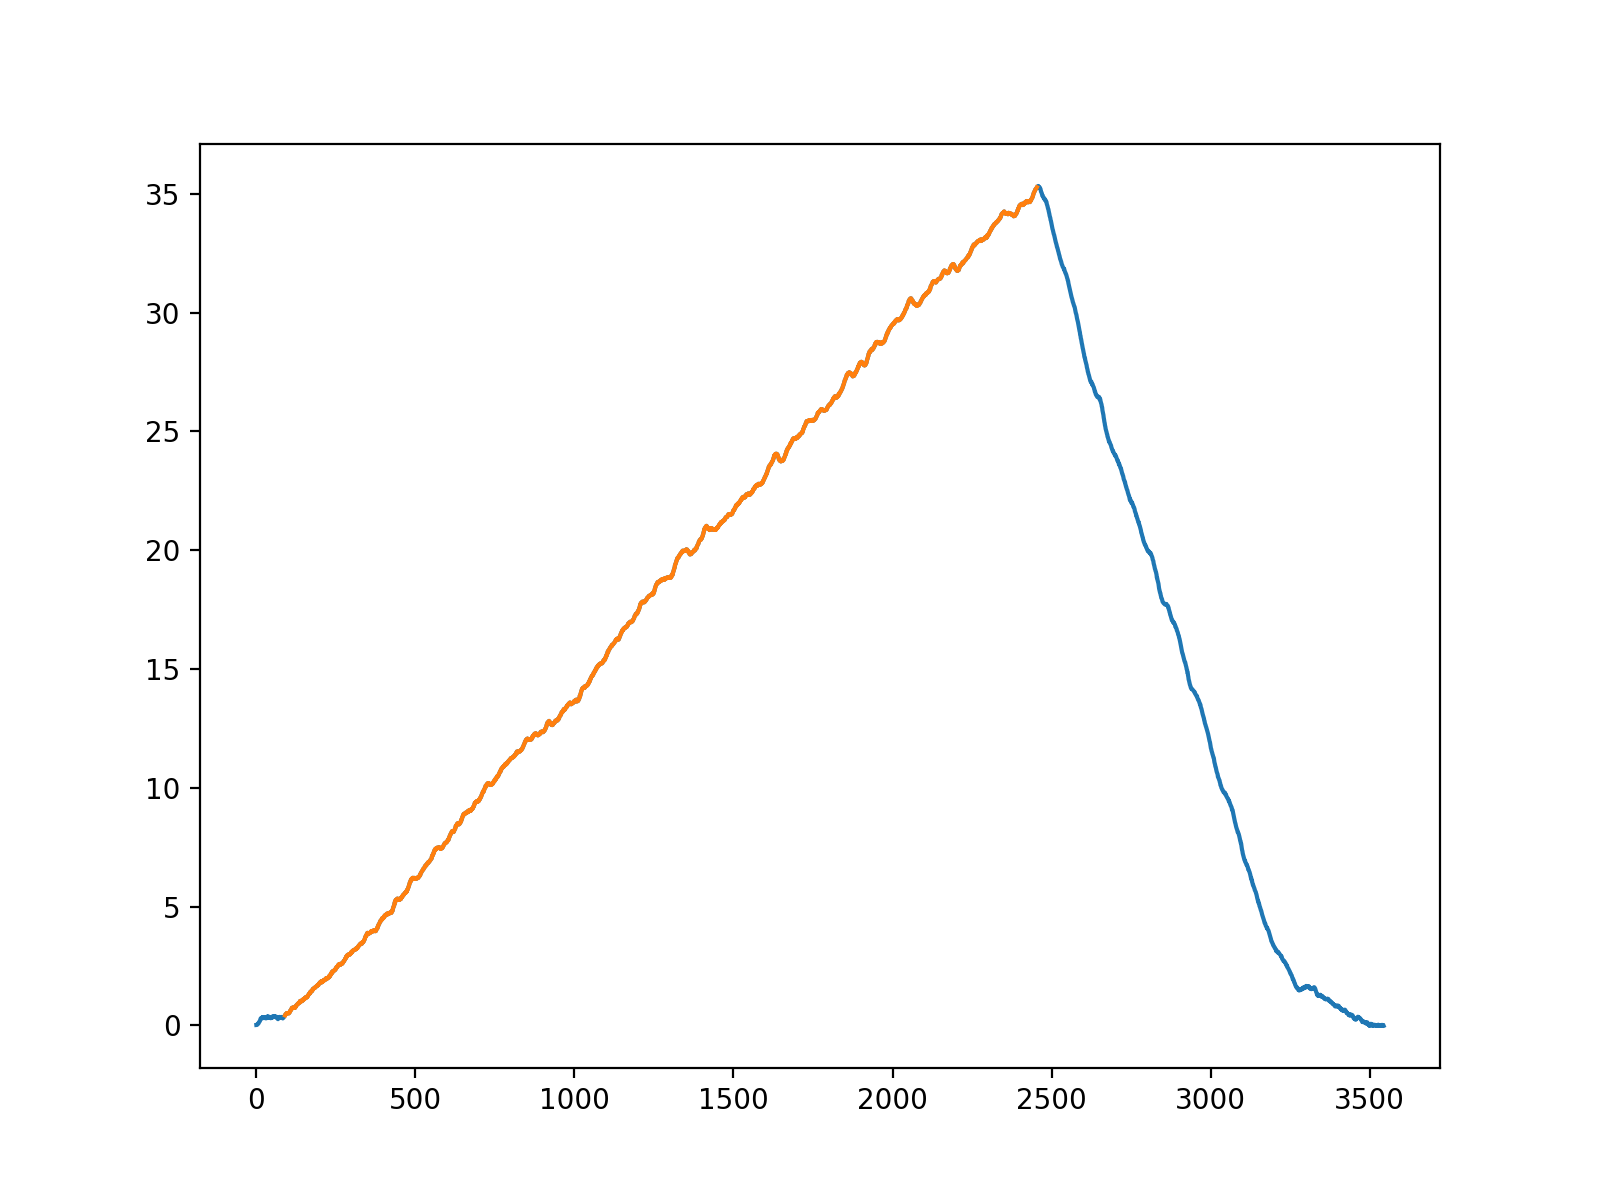

In [19]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(S2['Depth'])
S2_down = S2.iloc[90:2455].copy()
ax.plot(S2_down['Depth'])

<IPython.core.display.Javascript object>


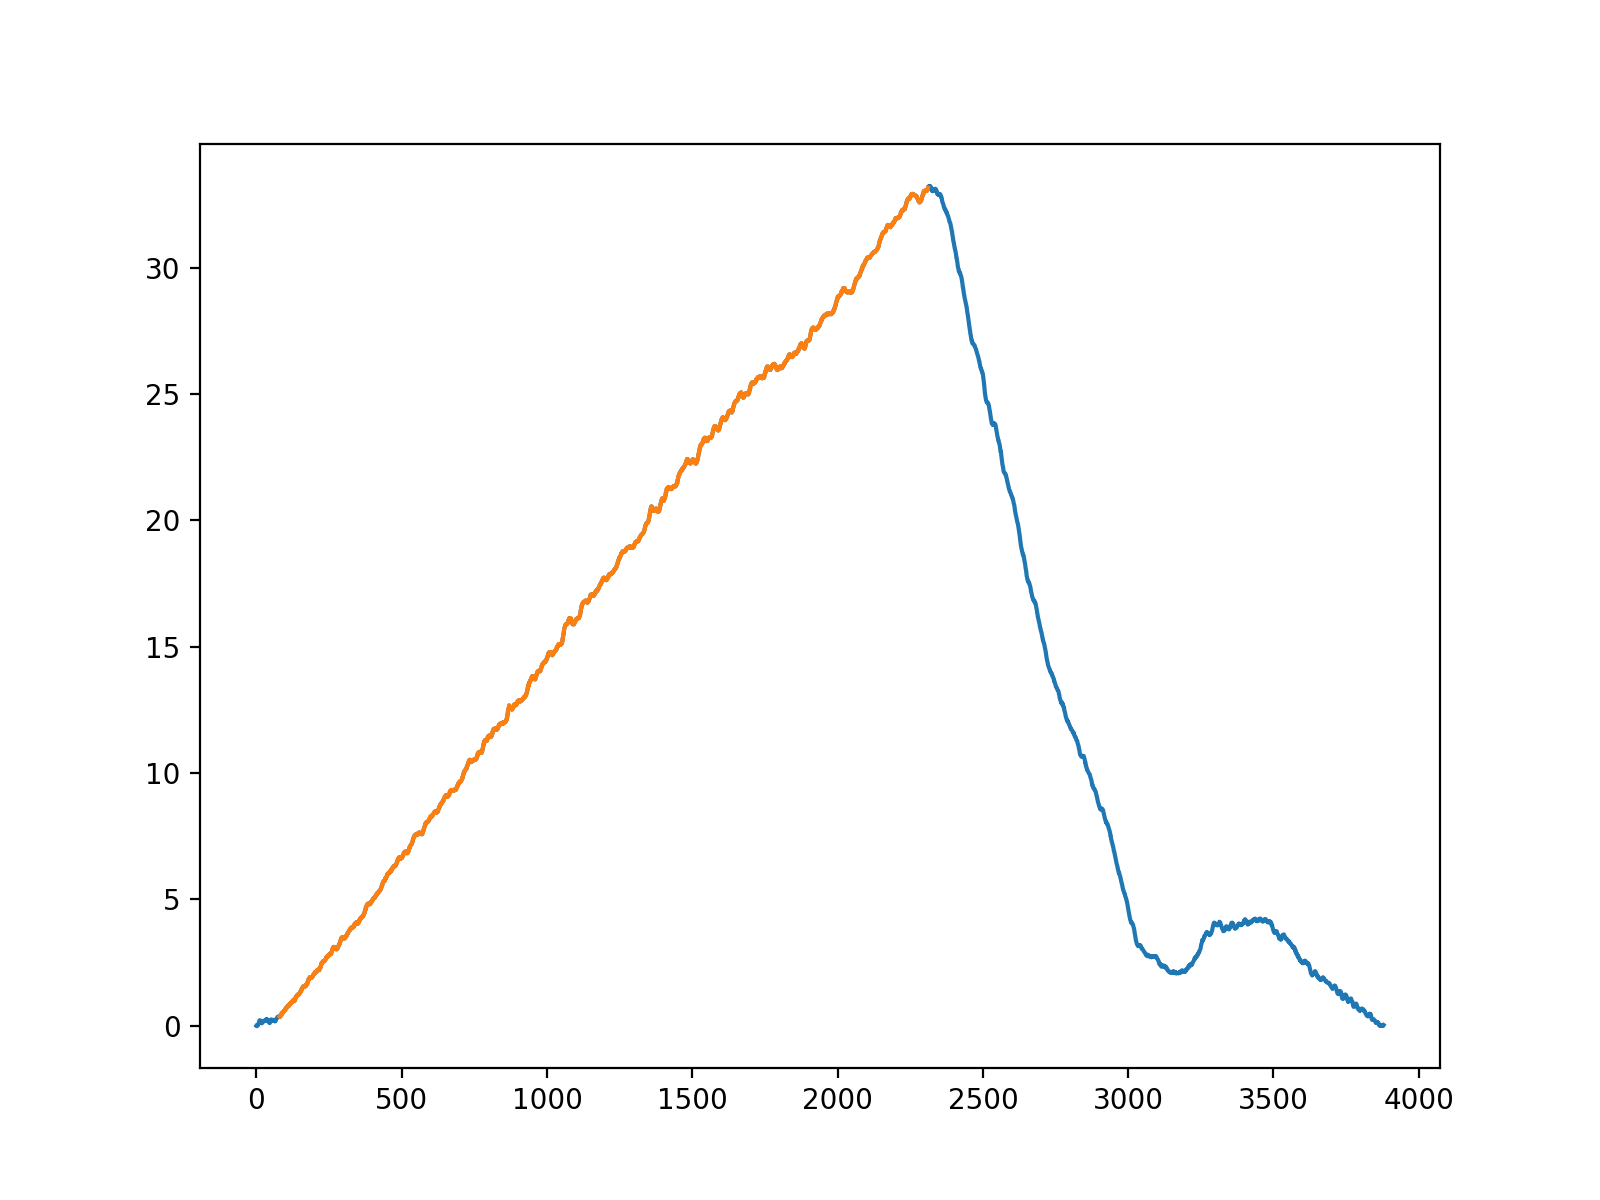

In [20]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(S3['Depth'])
S3_down = S3.iloc[80:2312].copy()
ax.plot(S3_down['Depth'])

<IPython.core.display.Javascript object>


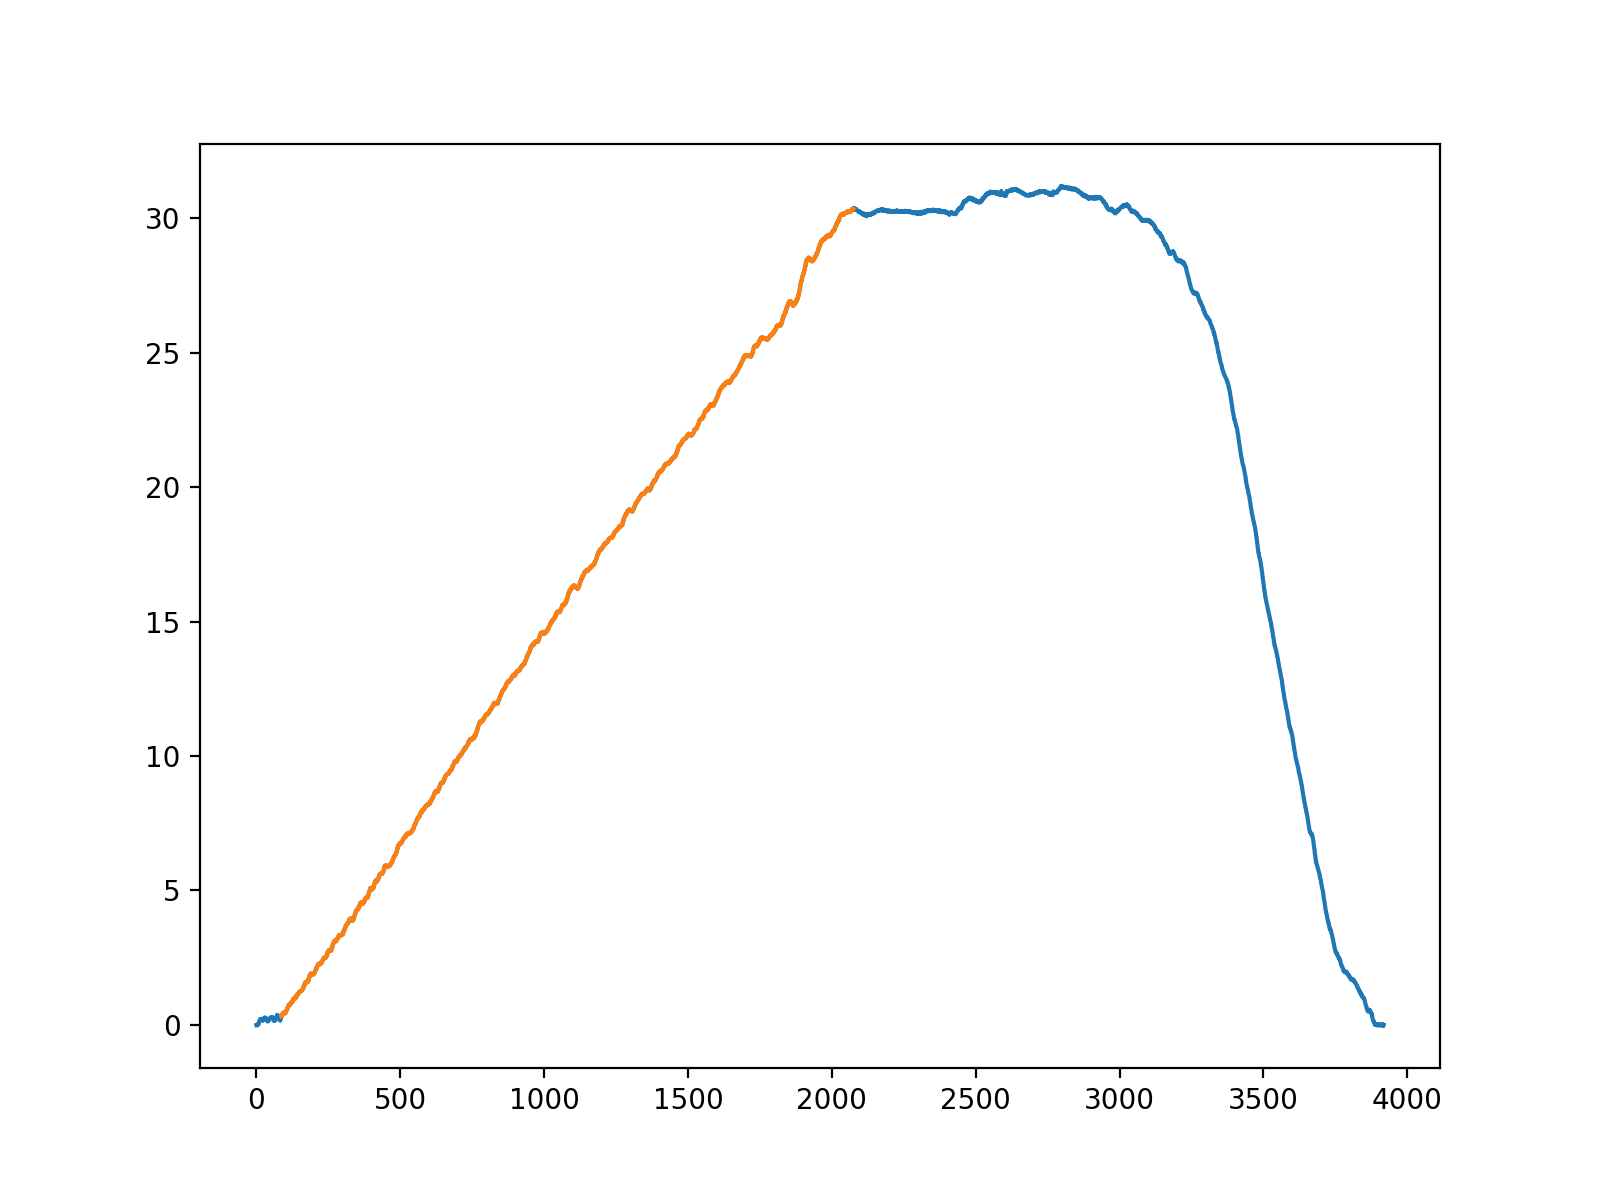

In [21]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(S4['Depth'])
S4_down = S4.iloc[87:2076].copy()
ax.plot(S4_down['Depth'])

<IPython.core.display.Javascript object>


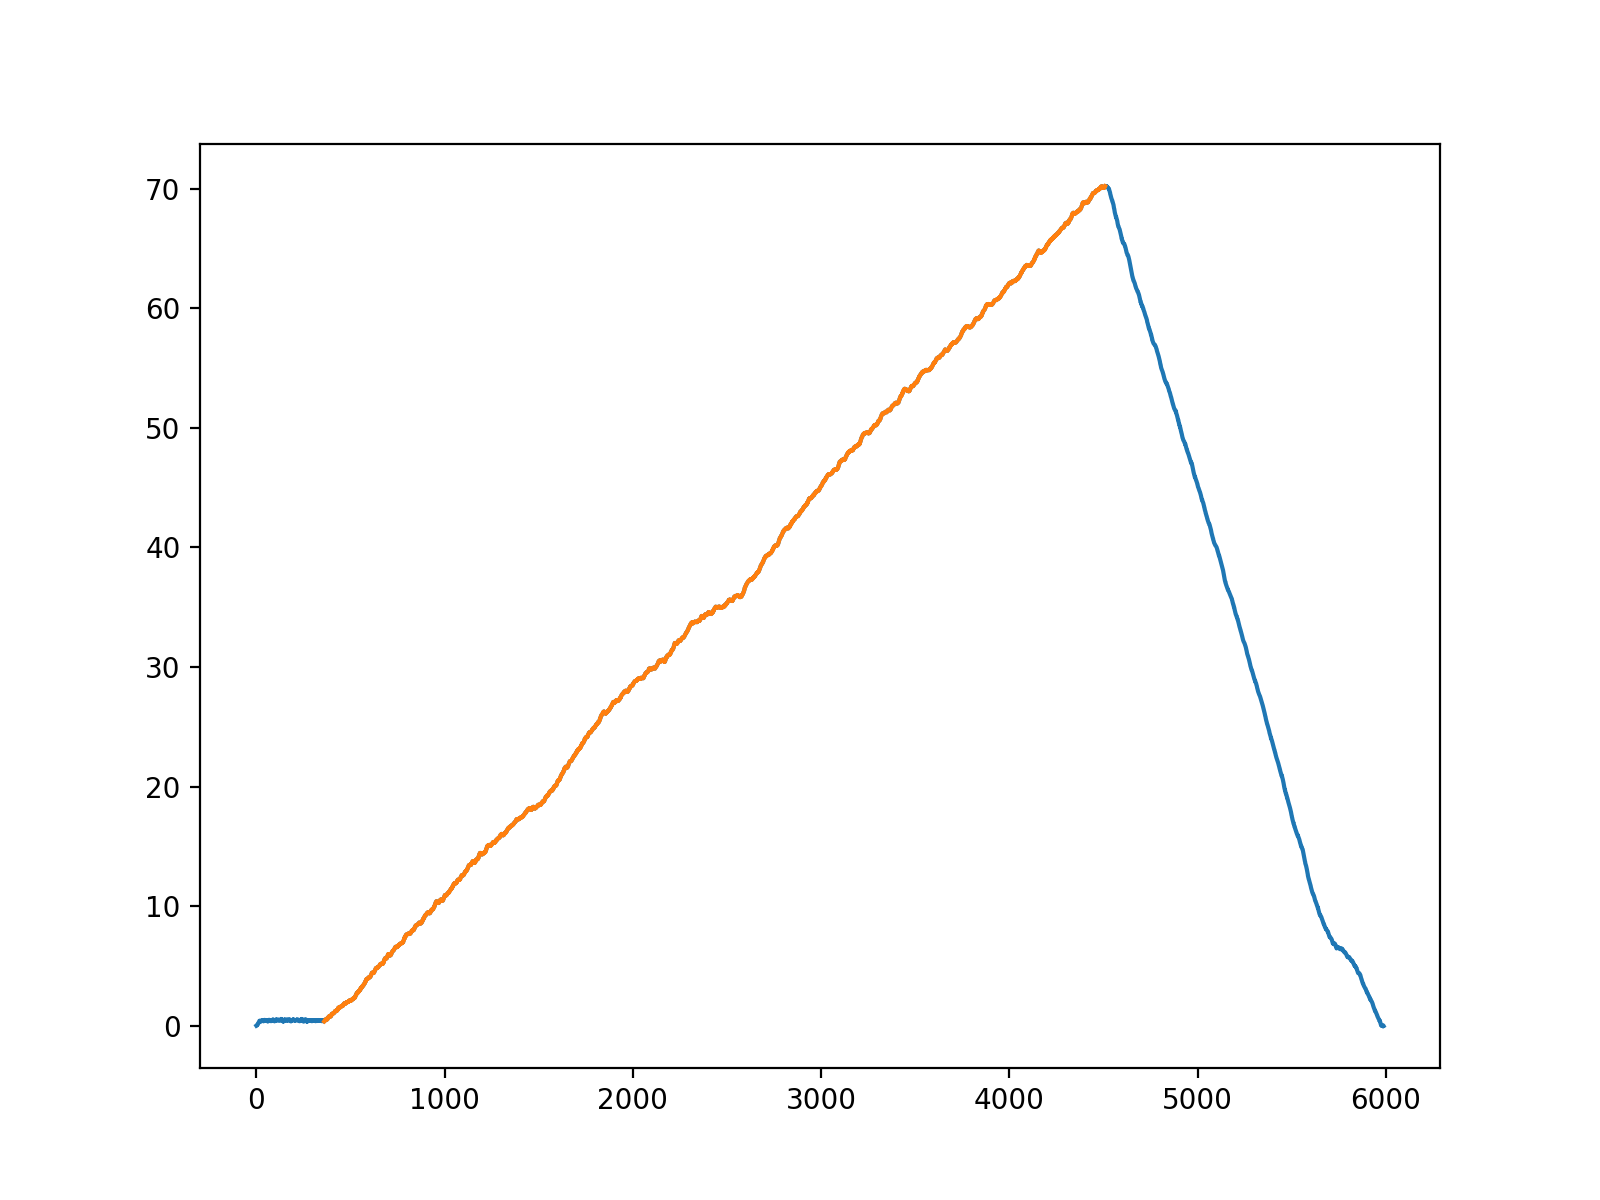

In [22]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(S5['Depth'])
S5_down = S5.iloc[360:4510].copy()
ax.plot(S5_down['Depth'])

<IPython.core.display.Javascript object>


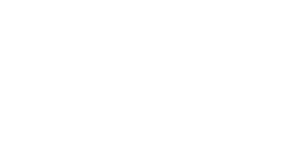

In [23]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(S6['Depth'])
S6_down = S6.iloc[114:5420].copy()
ax.plot(S6_down['Depth'])
plt.close()

In [58]:
stations_slack = [S1_down,S2_down,S3_down,S4_down,S5_down,S6_down]

<IPython.core.display.Javascript object>


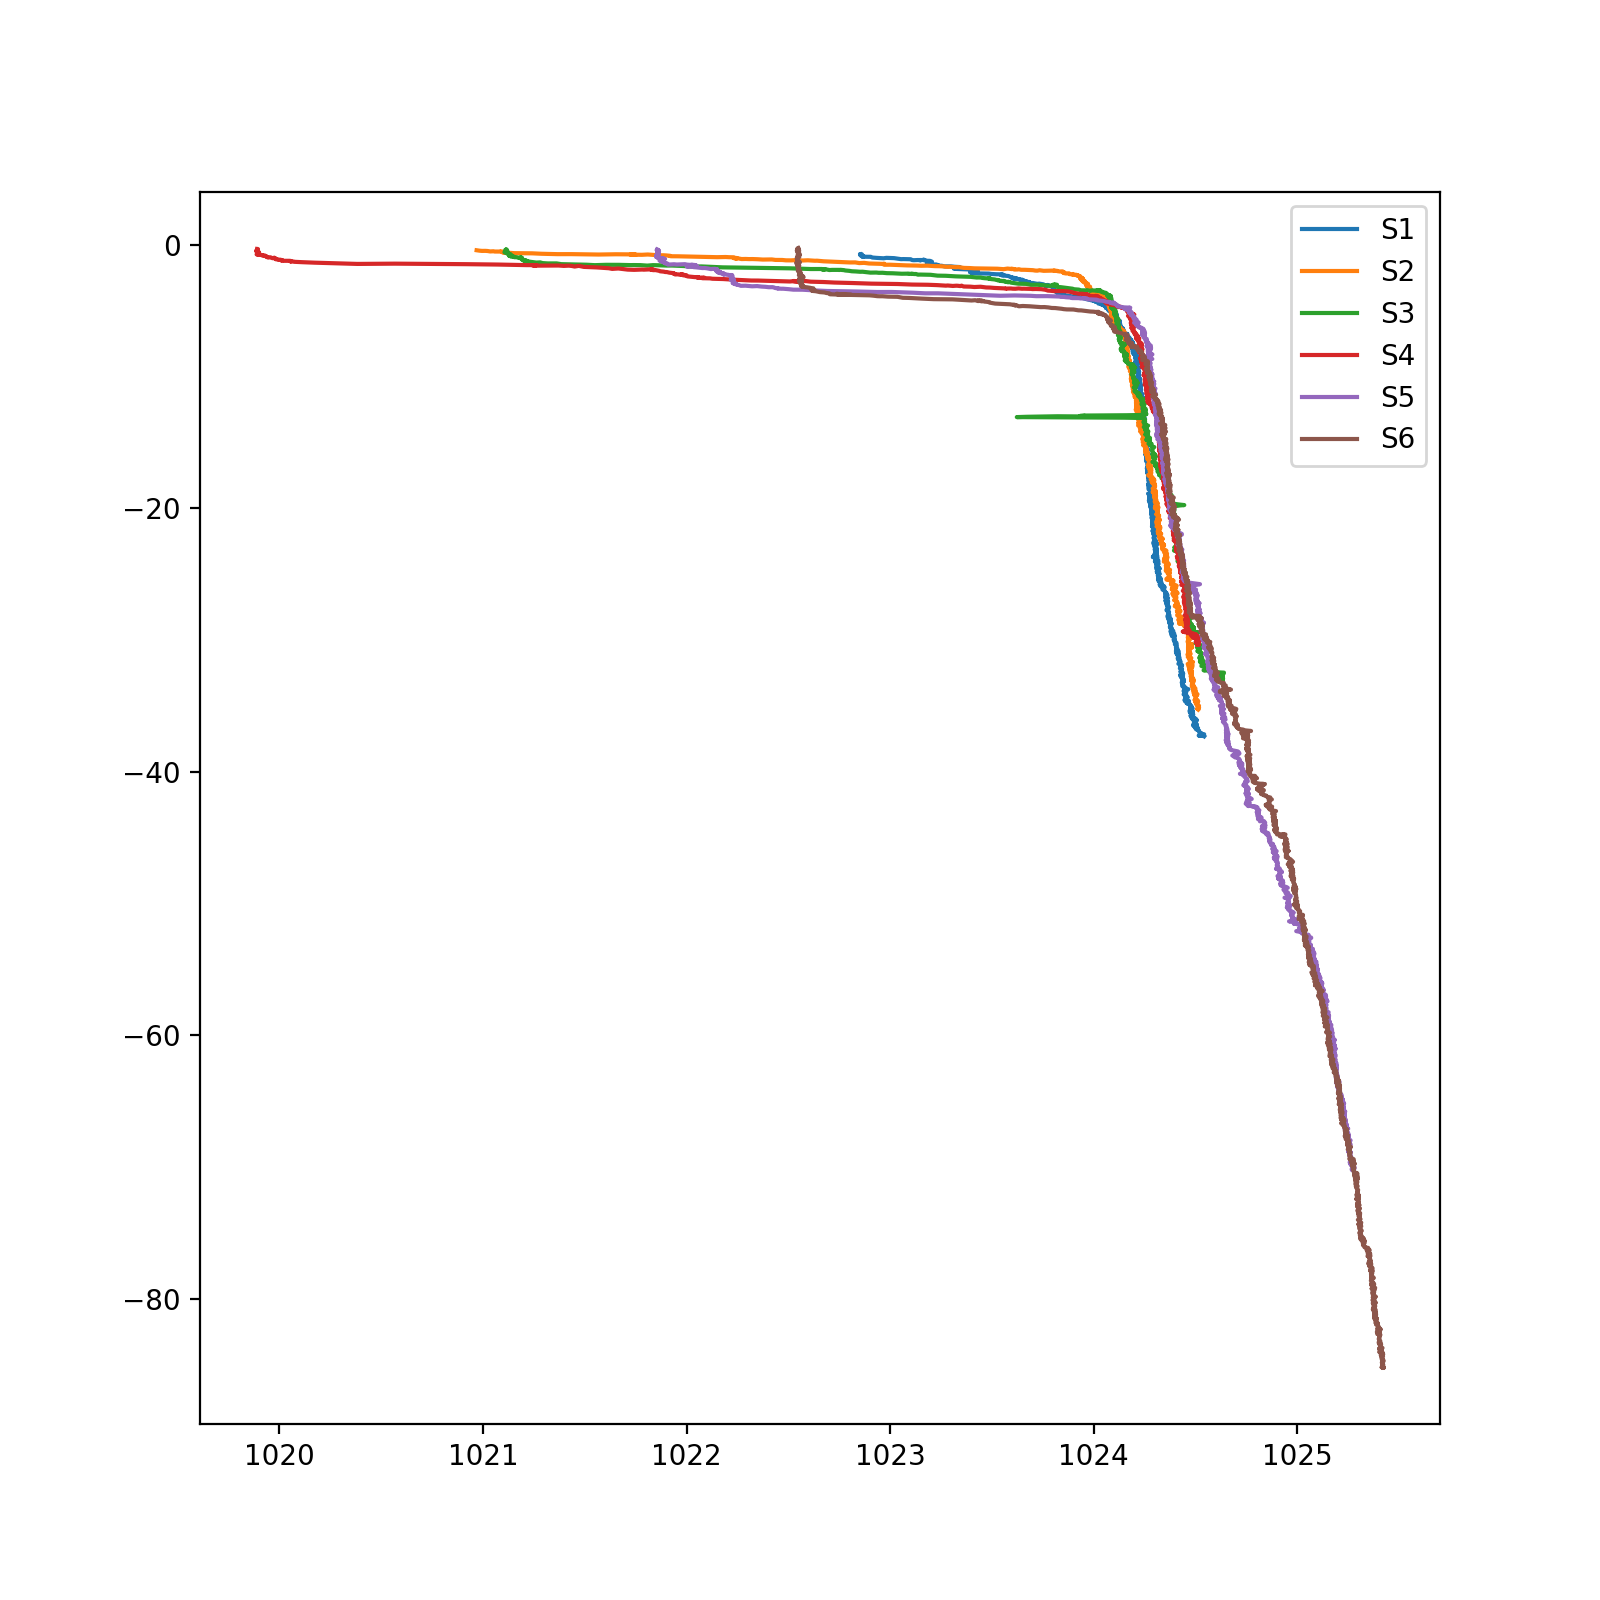

In [59]:
fig,ax = plt.subplots(figsize=[8,8])
labels=['S1','S2','S3','S4','S5','S6']
for i in range(len(stations_F)):
    ax.plot(stations_slack[i]['Density'],-stations_slack[i]['Depth'],label=labels[i])
    
ax.legend()


# Selecting Downcast of Saturday

<IPython.core.display.Javascript object>


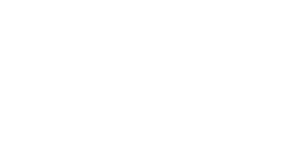

In [41]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(E1['Depth'])
E1_down = E1.iloc[490:2880].copy()
ax.plot(E1_down['Depth'])
plt.close()

NameError: name 'E2' is not defined

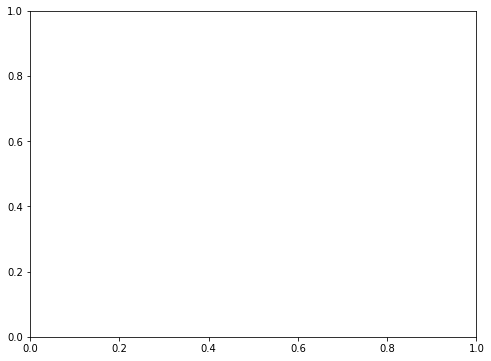

In [5]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(E2['Depth'])
E2_down = E2.iloc[370:2330].copy()
ax.plot(E2_down['Depth'])
# plt.close()

<IPython.core.display.Javascript object>


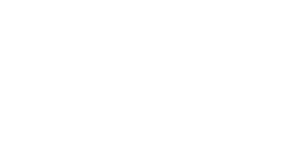

In [43]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(E3['Depth'])
E3_down = E3.iloc[147:1820].copy()
ax.plot(E3_down['Depth'])
plt.close()

<IPython.core.display.Javascript object>


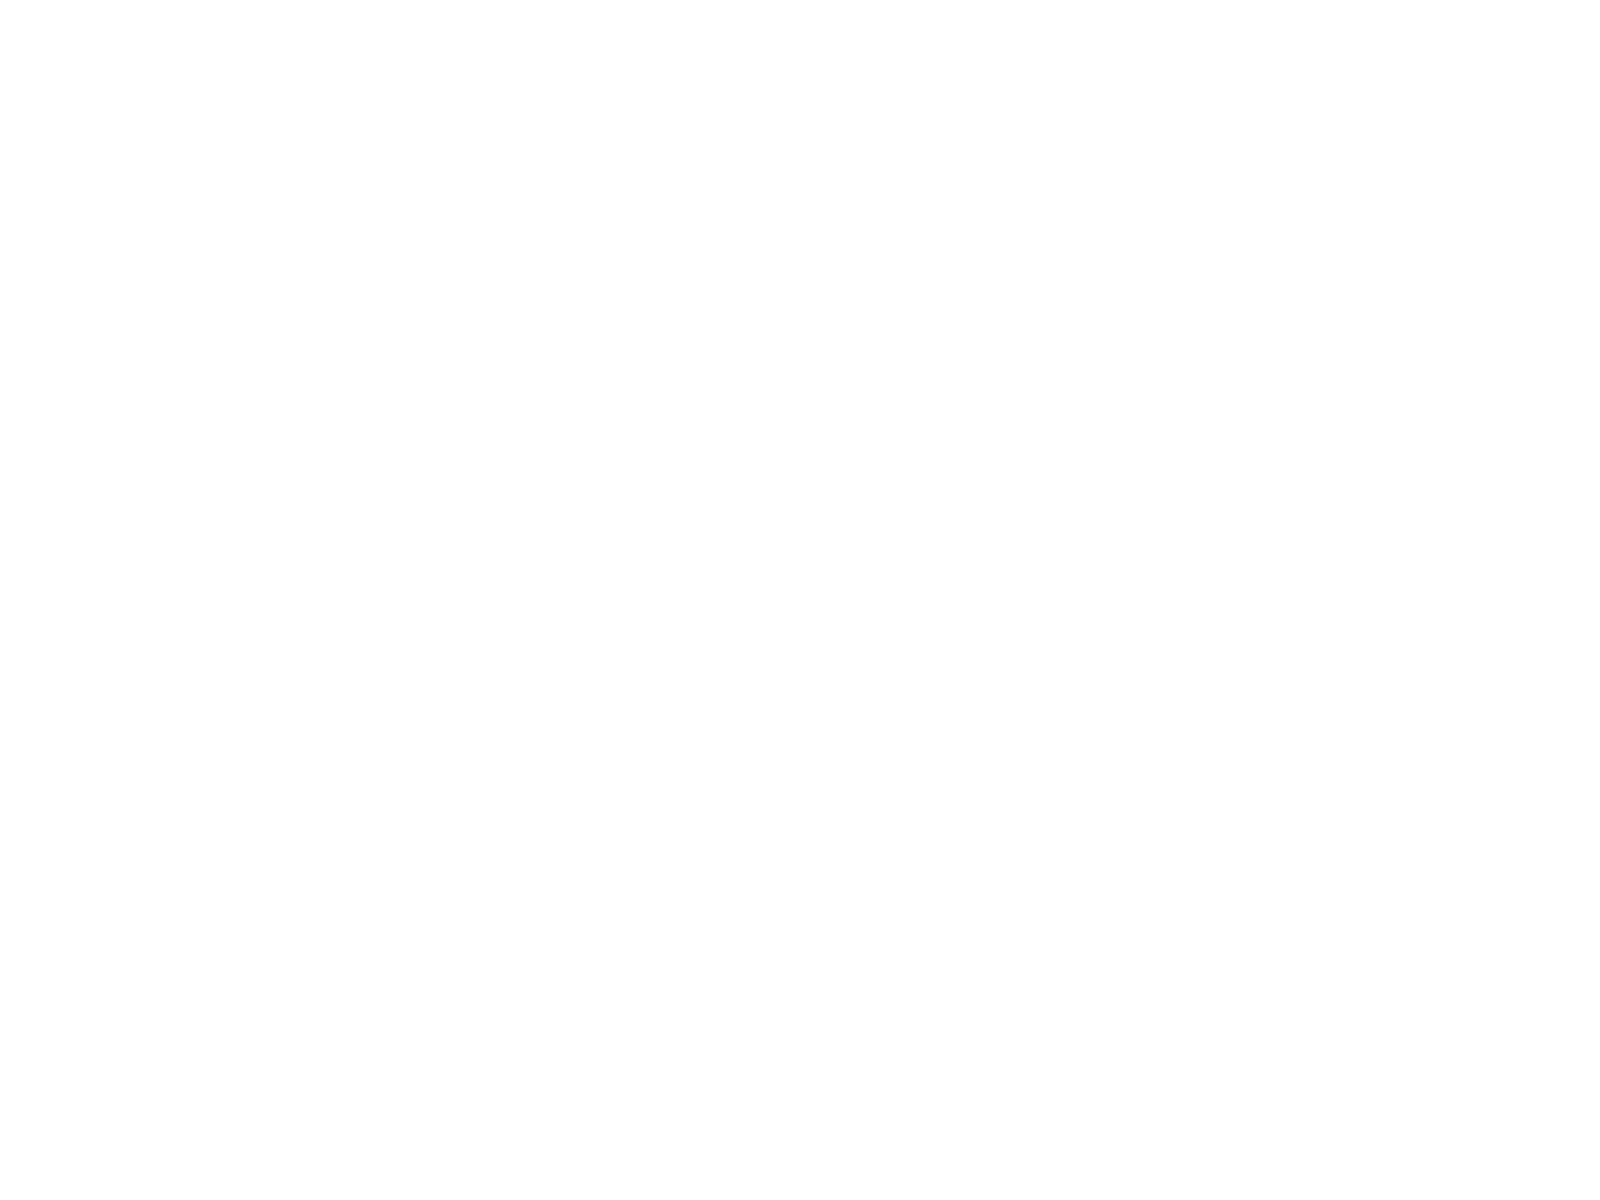

In [44]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(E4['Depth'])
E4_down = E4.iloc[156:1623].copy()
ax.plot(E4_down['Depth'])
plt.close()

<IPython.core.display.Javascript object>


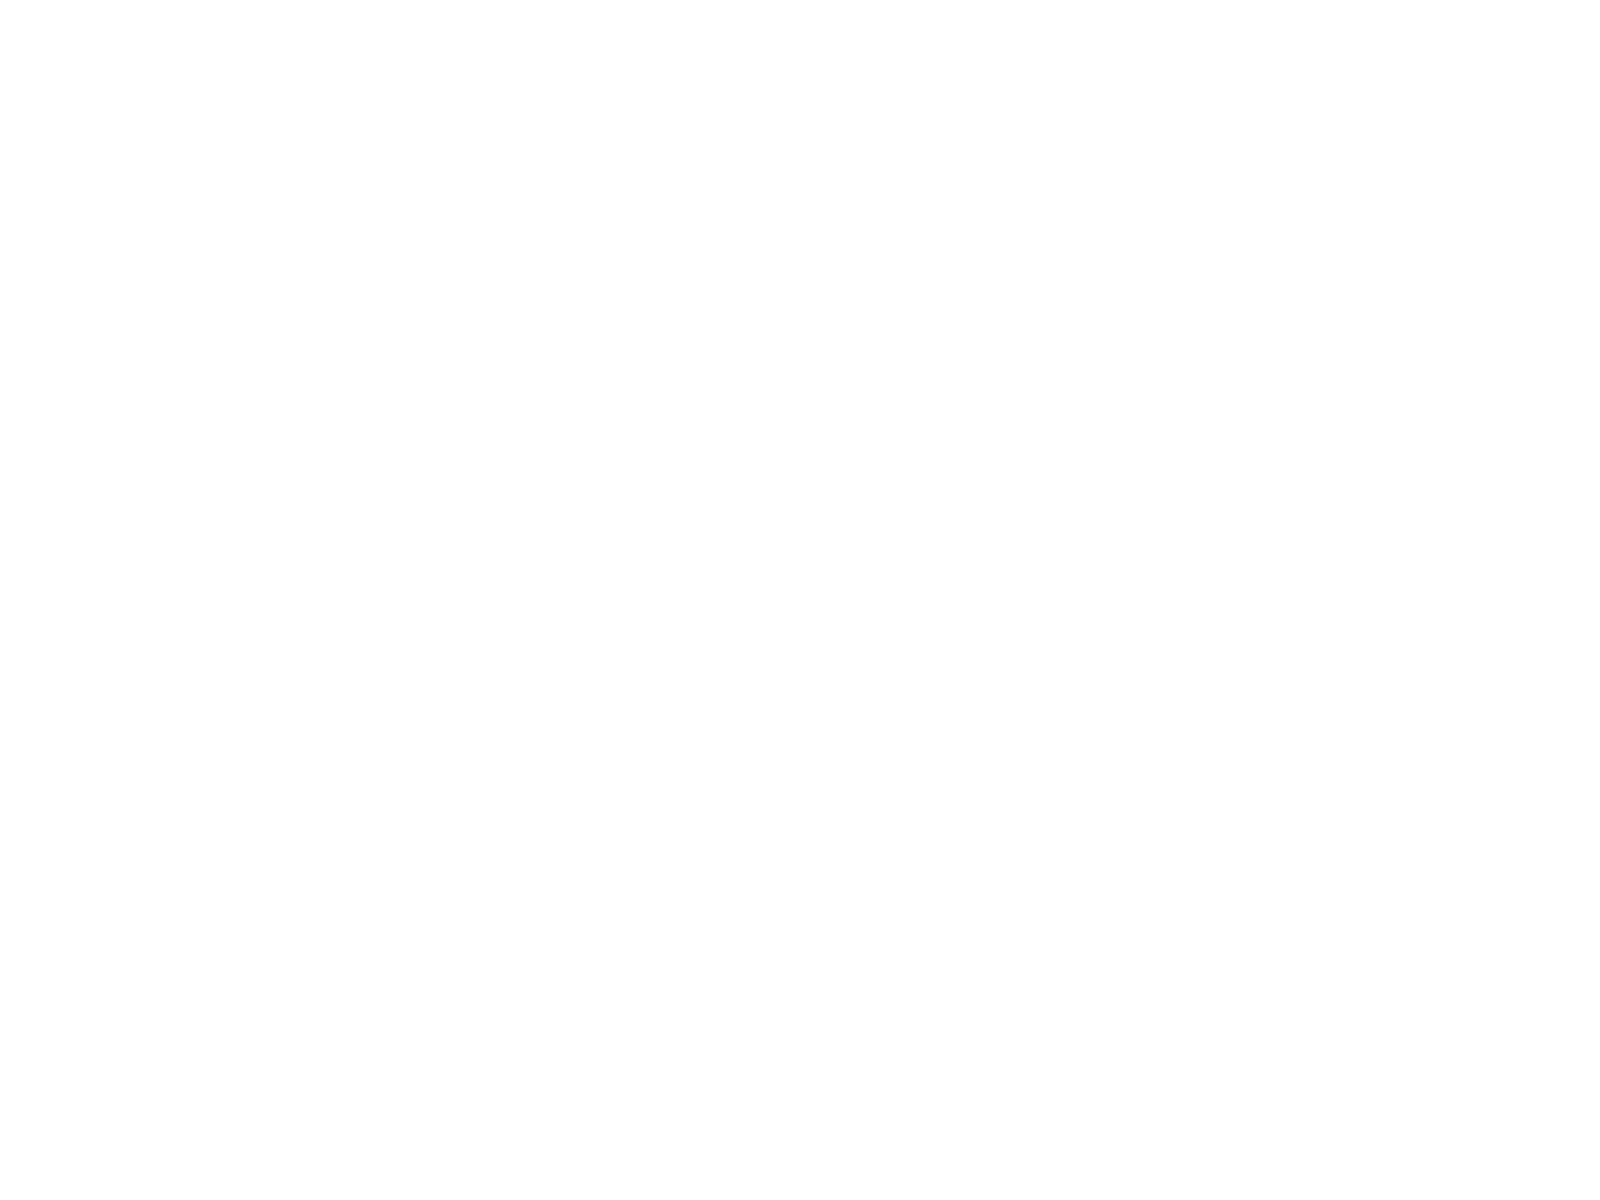

In [45]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(E5['Depth'])
E5_down = E5.iloc[195:1750].copy()
ax.plot(E5_down['Depth'])
plt.close()

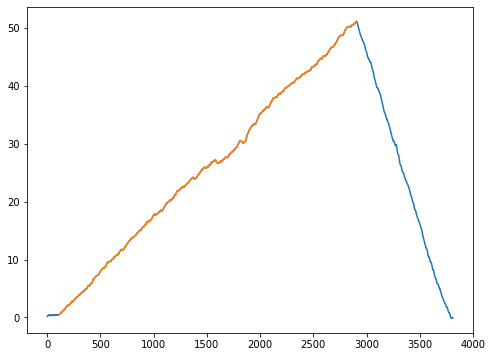

In [10]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(E6['Depth'])
E6_down = E6.iloc[111:2900].copy()
ax.plot(E6_down['Depth'])


<IPython.core.display.Javascript object>


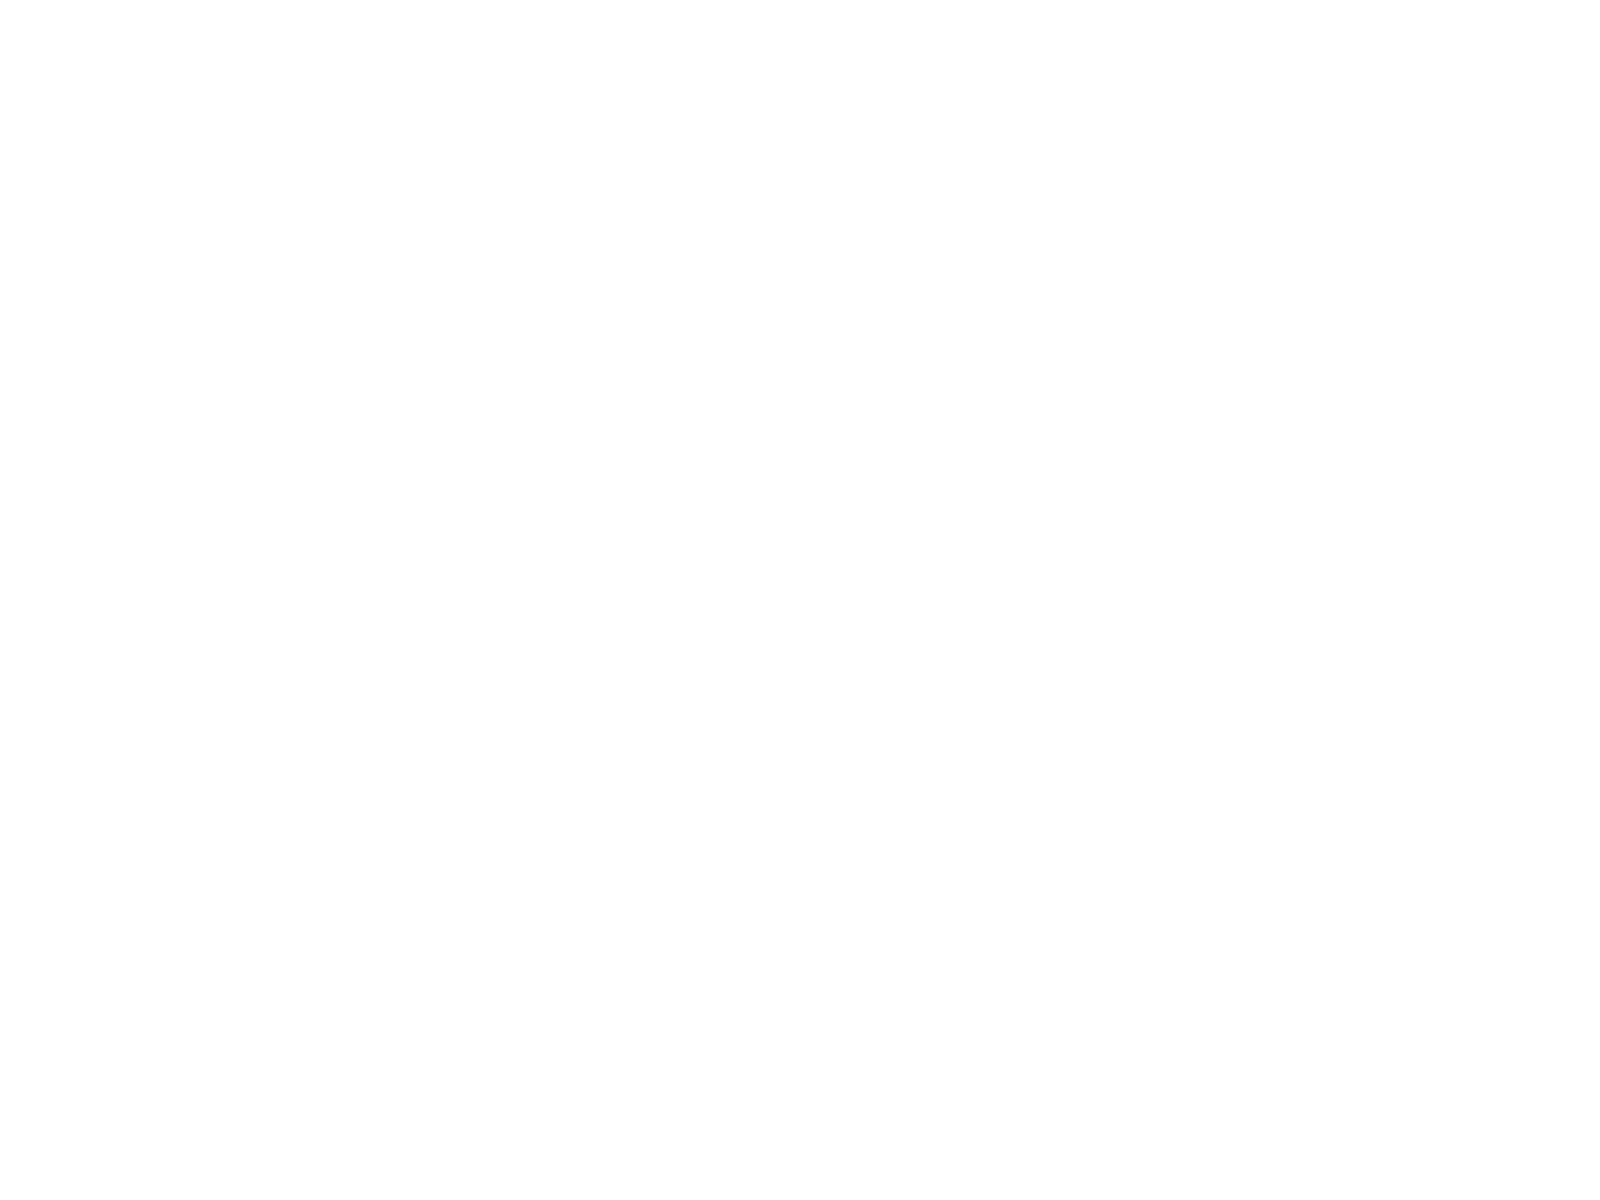

In [47]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(E7['Depth'])
E7_down = E7.iloc[168:4250].copy()
ax.plot(E7_down['Depth'])
plt.close()

<IPython.core.display.Javascript object>


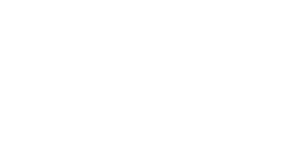

In [48]:
fig,ax=plt.subplots(figsize=[8,6])
ax.plot(E8['Depth'])
E8_down = E8.iloc[130:4380].copy()
ax.plot(E8_down['Depth'])
plt.close()

In [49]:
stations_ebb = [E1_down,E2_down,E3_down,E4_down,E5_down,E6_down,E7_down,E8_down]

<IPython.core.display.Javascript object>


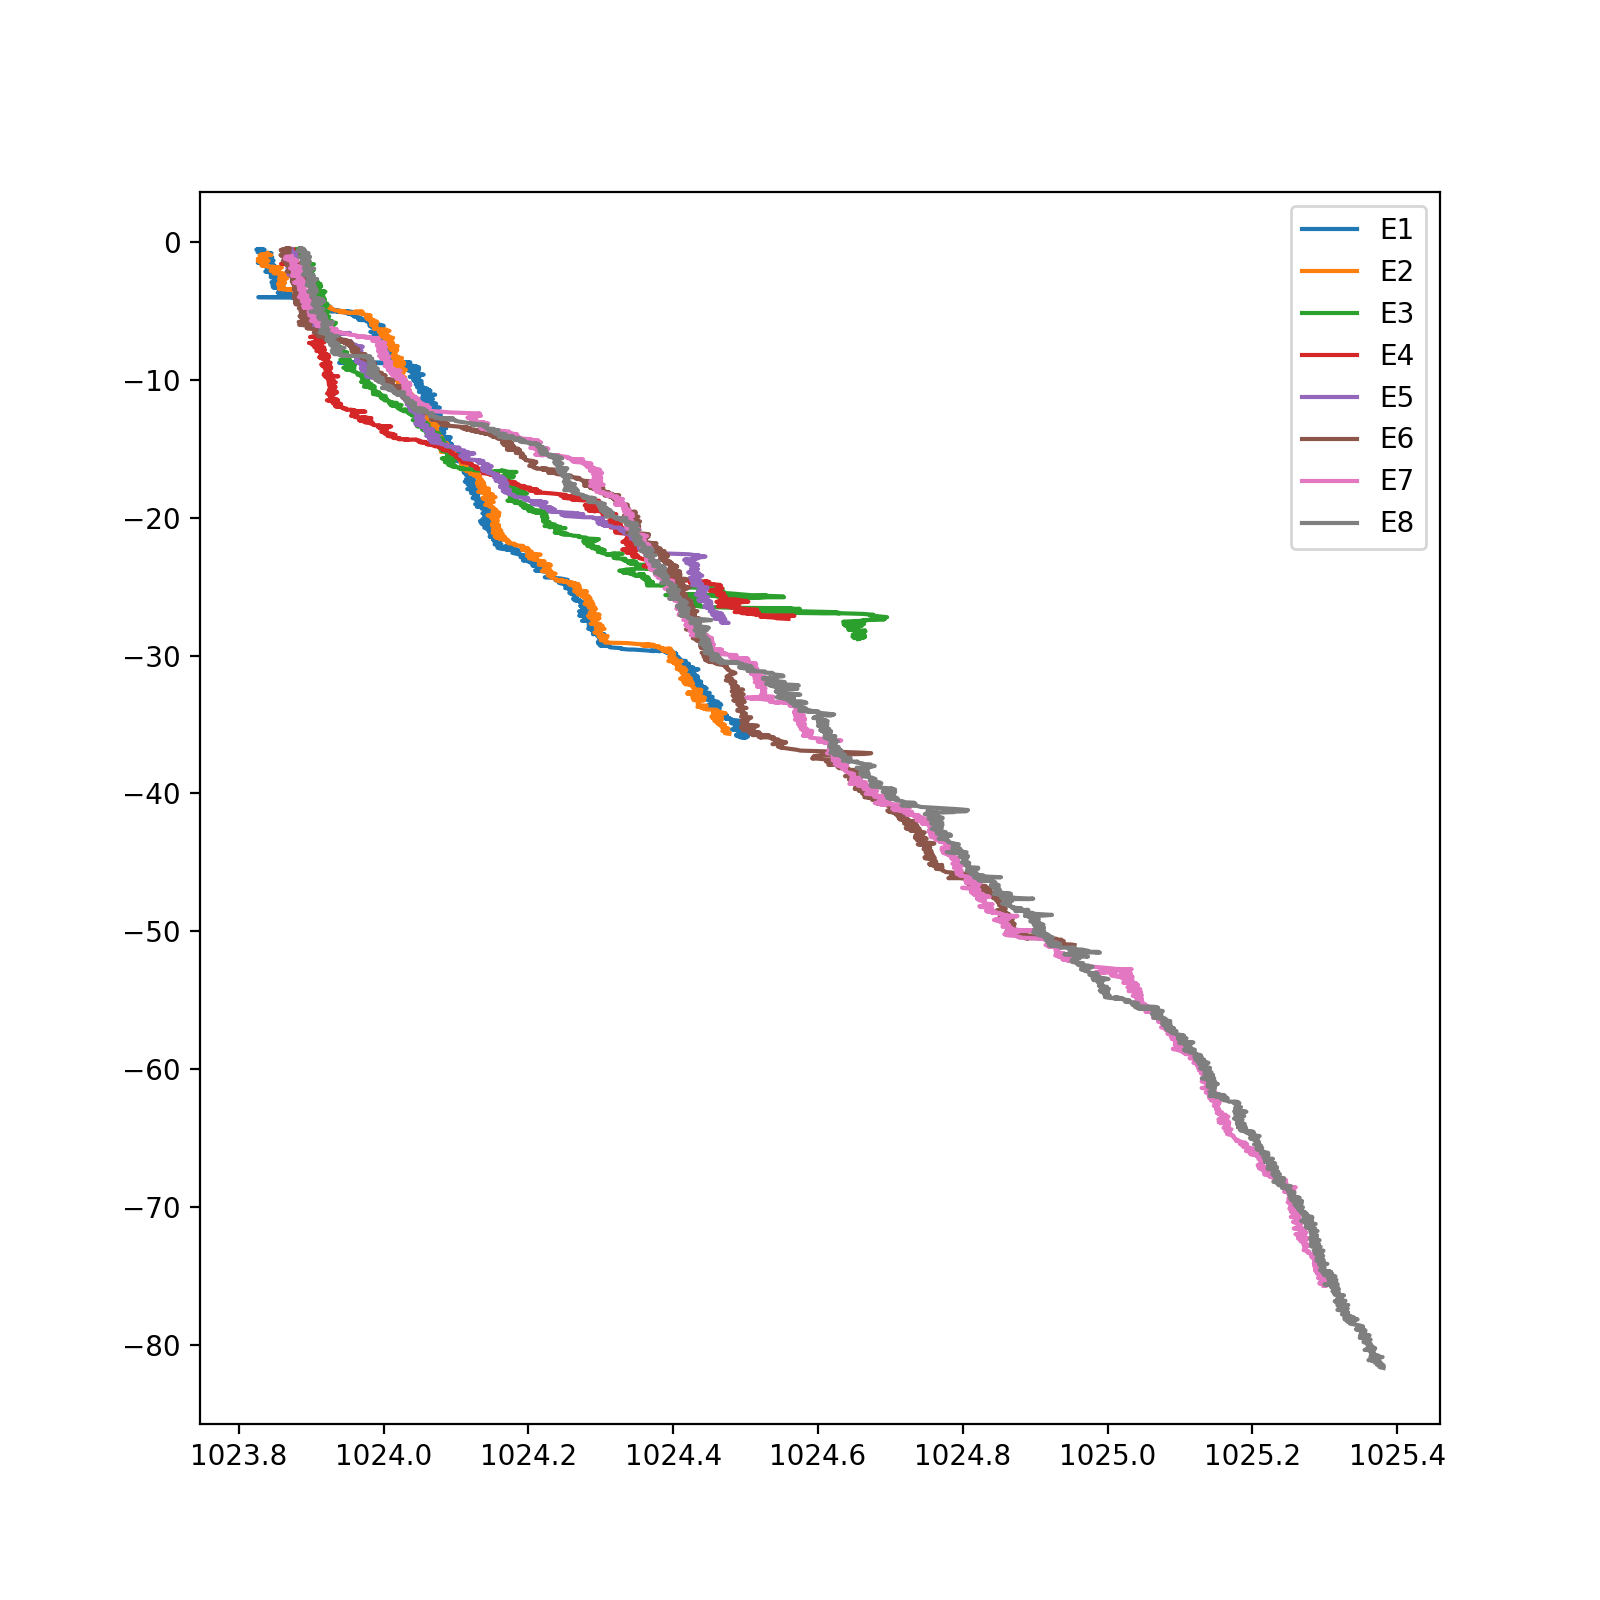

In [53]:
fig,ax = plt.subplots(figsize=[8,8])
labels=['E1','E2','E3','E4','E5','E6','E7','E8']
for i in range(len(stations_ebb)):
    ax.plot(stations_ebb[i]['Density'],-stations_ebb[i]['Depth'],label=labels[i])
    
ax.legend()

In [61]:
def plot_stations(stations_slack,stations_ebb,figsz,param):
    numstations = len(stations_slack)
    fig,ax = plt.subplots(1,numstations,figsize=figsz)
    
    stepsize=5
    for i in range(numstations):
        ax[i].plot(stations_slack[i]["Salinity"],-stations_slack[i]["Depth"],label='Slack Tide')
        ax[i].plot(stations_ebb[i]["Salinity"],-stations_ebb[i]["Depth"],label='Ebb Tide')
        
        
#         start, end = ax[i].get_ylim()
        start,end = [-85,0]
        ax[i].yaxis.set_ticks(np.arange(start,end,stepsize))
        
        ax[i].legend(fontsize=14)

        ax[i].set_xlabel(param, fontsize=14)  
          

        plt.tick_params(axis='both', labelsize=12)
    ax[0].set_ylabel("Depth [m]", fontsize=14)

<IPython.core.display.Javascript object>


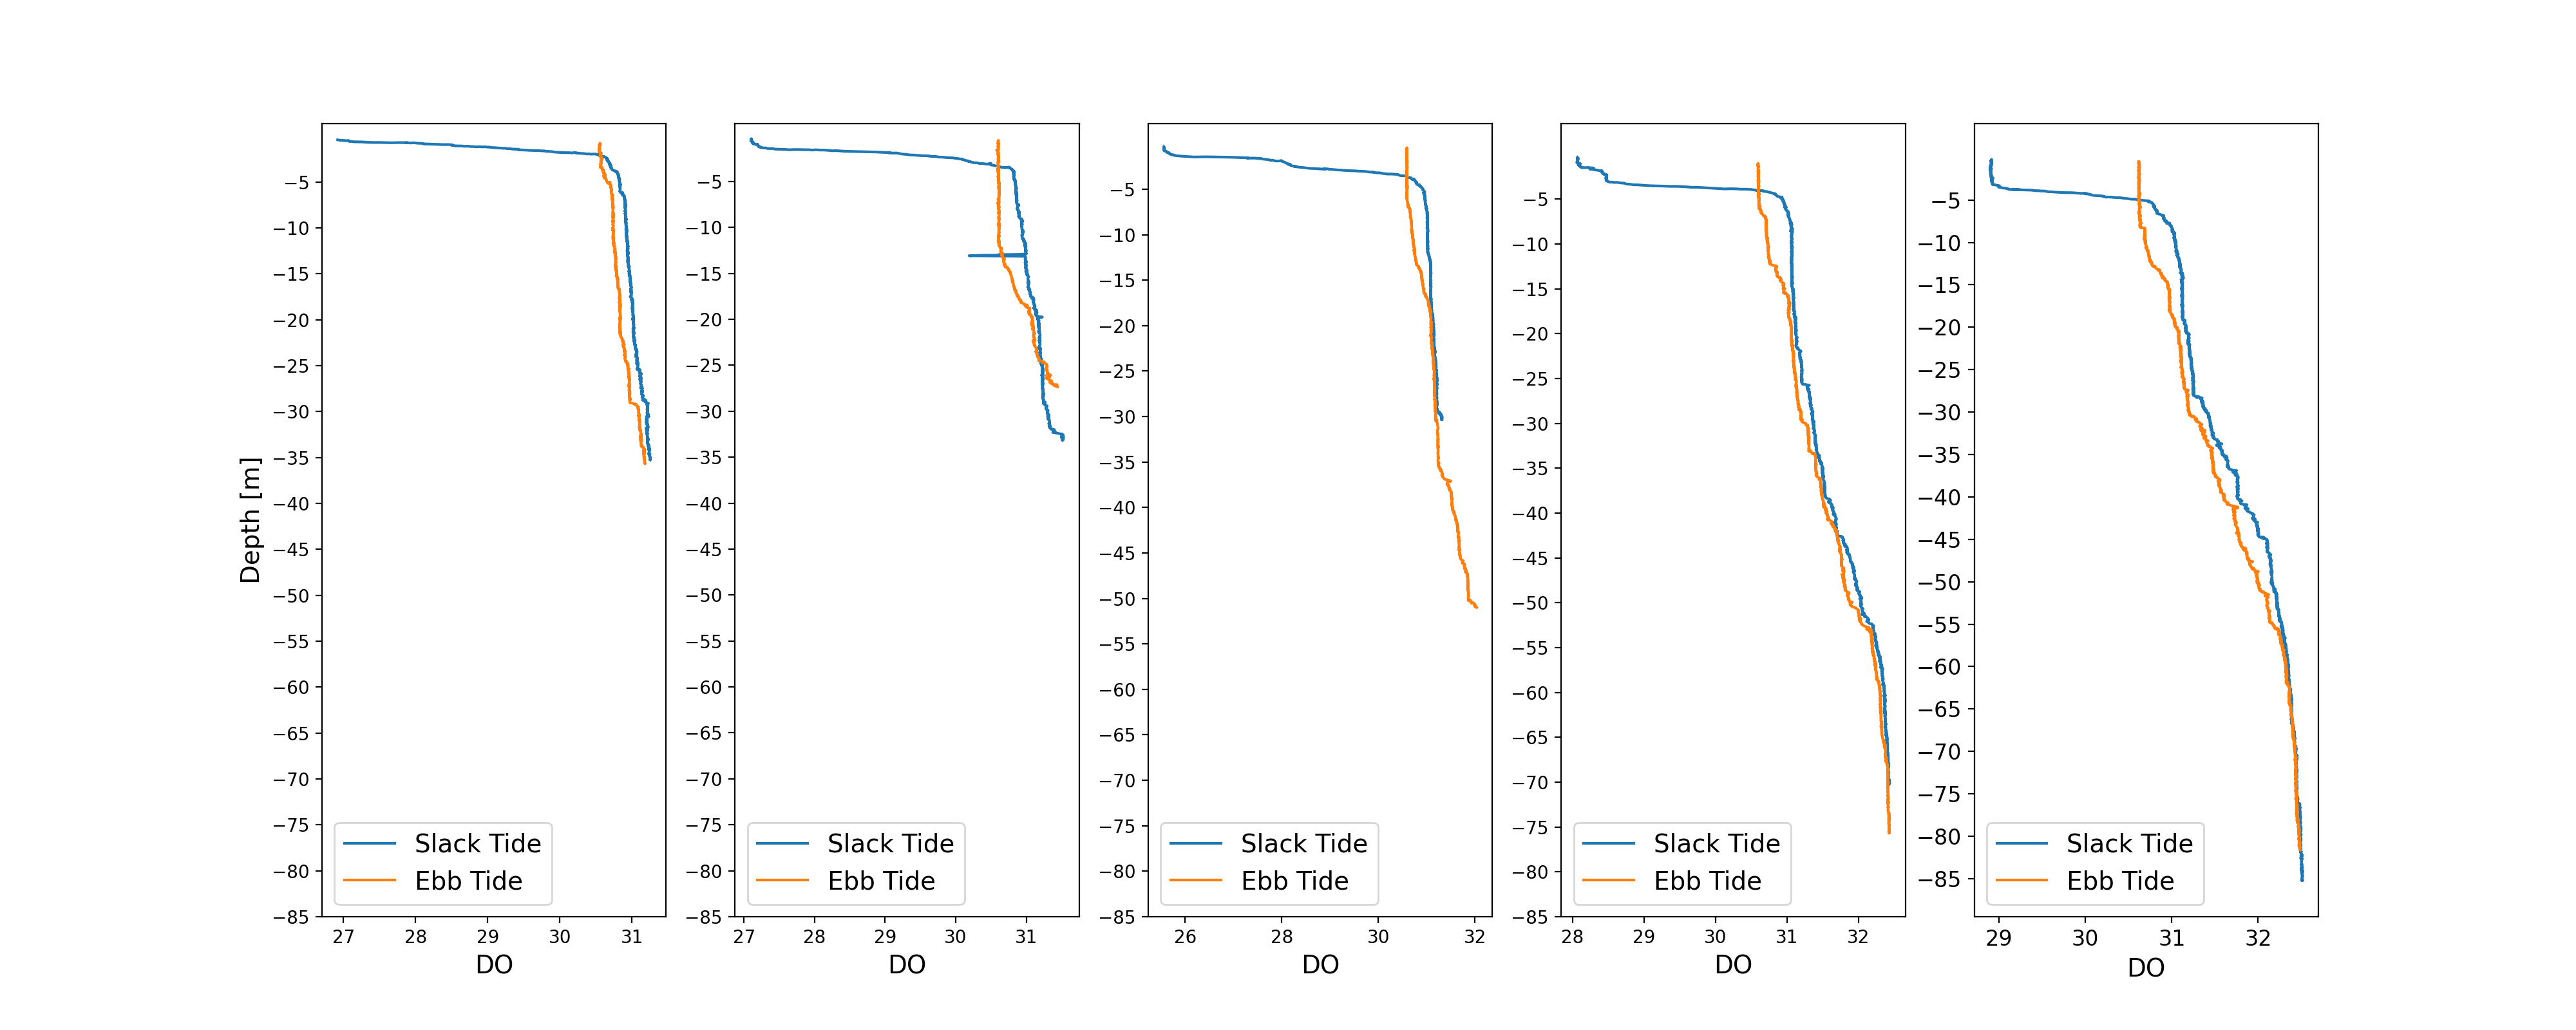

In [62]:
stations_ebb_solo_idx = [1,3,5,6,7]
dfs = []
for i in range(len(stations_ebb_solo_idx)):
    dfs.append(stations_ebb[stations_ebb_solo_idx[i]])

stations_ebb_nodup = dfs.copy()

plot_stations(stations_slack[1:],stations_ebb_nodup,[20,8],"DO")

# If Done Going with Data – Downloading funct Here

In [63]:
test = E1_down.copy()
test.head()

,Date,Time,Cond,TempCT,pH,Turbidity,DO,TempDO,DOM,Pressure,Salinity,Density,CalcSV,Depth,file,Latitude,Longitude,StationID
490,2025-02-22,10:11:54.67,31.744,7.650,8.14,0.0,333.87,7.65,0.33,0.54512,30.545975,1023.828674,1475.624756,0.54050,10-11-05,48.86092,-125.18383,E1
491,2025-02-22,10:11:54.77,31.743,7.647,8.14,0.0,333.87,7.65,0.29,0.55628,30.548241,1023.830994,1475.614136,0.55156,10-11-05,48.86092,-125.18383,E1
492,2025-02-22,10:11:54.87,31.742,7.646,8.14,0.0,333.87,7.65,0.33,0.53055,30.548100,1023.830872,1475.610474,0.52605,10-11-05,48.86092,-125.18383,E1
493,2025-02-22,10:11:54.97,31.740,7.652,8.14,0.0,333.87,7.65,0.32,0.57858,30.540630,1023.824341,1475.627197,0.57368,10-11-05,48.86092,-125.18383,E1
494,2025-02-22,10:11:55.07,31.743,7.647,8.14,0.0,333.87,7.65,0.28,0.54445,30.547762,1023.830505,1475.615479,0.53984,10-11-05,48.86092,-125.18383,E1


In [78]:
def make_csv(dataframe,name,name_file):
    #Transform to Seabird format
    #Temperature (ºC), Pressure (db), Conductivity (mS/cm), Turbidity (FTU), Oxygen (ml/L), Salinity (PSU), Density (kg/m^3)...
    #vs
    #TempCT (ºC), Pressure (db), Cond (mS/cm), Turbidity (NTU), DO (micromol/L), Salinity (PSU), Density (kg/m3)

    data = dataframe.copy()
    data['StationID'] = name
    data = data.drop(['file'],axis=1).copy()
    order_cols = ['StationID','Date','Time','Latitude','Longitude','Pressure','TempCT','Cond','DO','Salinity','Density','Depth','DOM','Turbidity']
    data = data[order_cols]
    data['DO'] = data['DO']/44.660 #convert to ml/L
    data.rename(columns={'TempCT':'Temperature','Cond':'Conductivity','DO':'Oxygen'},inplace=True)
    data.to_csv(name_file,index=False)
        

In [79]:
stationnames_slack = ['S1','S2','S3','S4','S5','S6']
stationnames_ebb = ['E1','E2','E3','E4','E5','E6','E7','E8']

for i in range(len(stations_slack)):
    namefile = 'SatellitePassage_Data/Downcasts/'+ stationnames_slack[i] + '.csv'
    make_csv(stations_slack[i],stationnames_slack[i],namefile)
    

for i in range(len(stations_ebb)):
    namefile = 'SatellitePassage_Data/Downcasts/'+ stationnames_ebb[i] + '.csv'
    make_csv(stations_ebb[i],stationnames_ebb[i],namefile)

In [74]:
E1.head()

,Date,Time,Cond,TempCT,pH,Turbidity,DO,TempDO,DOM,Pressure,Salinity,Density,CalcSV,Depth,file,Latitude,Longitude,StationID
0,2025-02-22,10:11:05.67,31.966,7.730,4.98,2.81,318.17,9.66,0.22,-0.02576,30.712761,1023.946167,1476.128052,-0.02554,10-11-05,48.86092,-125.18383,E1
1,2025-02-22,10:11:05.77,31.884,7.710,5.14,1.22,318.17,9.66,0.19,0.01201,30.642340,1023.893677,1475.967896,0.01191,10-11-05,48.86092,-125.18383,E1
2,2025-02-22,10:11:05.87,31.846,7.715,5.29,0.55,318.17,9.66,0.21,0.02822,30.598452,1023.858643,1475.931641,0.02798,10-11-05,48.86092,-125.18383,E1
3,2025-02-22,10:11:05.97,31.817,7.704,5.39,0.06,318.17,9.66,0.26,0.06265,30.577085,1023.843628,1475.862061,0.06212,10-11-05,48.86092,-125.18383,E1
4,2025-02-22,10:11:06.07,31.811,7.694,5.51,0.00,318.17,9.66,0.33,0.10161,30.579870,1023.847351,1475.827881,0.10075,10-11-05,48.86092,-125.18383,E1
